# Motivation to Take Language Courses
---
We are all more connected to each other than ever before because of various things such as the social media, articles, and even the news; therefore because of this, exposure to various different languages become everso more common. Let’s look at  KPOP in recent years; it has had an explosion in popularity in America culture despite most of the media being in Korean rather than English. With over 58% of the student population at UCSD identifying with ethnicities where the ethnic language is not English, hence our interest lies within the motivators which bring students within our body to learn additional languages. Specifically our question is what motivators drive the acquisition of language for students currently/had taking language courses at UCSD? Are there differences in these motivators which effect acquisition and post-course language retention?Some of our factors include things like "Familial intentions, cultural appreciation, desire to better explore, or even "I want to get through my GEs"


## Loading in our Data
---
Our survey was conducted and modeled after the Attitude/Motivation Test Battery first designed by Robert Gardner in the context of studying people's motivation to learn secondary languages.

Our survey was adapted to the needs of the UCSD student demographic who were currently taking language courses as those students were the ones who aligned best with our research topic.

Additional points of inspiration for our survey came from the premise of **Instrumental** and **Integrative** Motivators, 

In [12]:
# Import packages for data analysis

# Data organization packages
import pandas as pd
import numpy  as np
import json
import sys 

# Plotting packages
from   mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import seaborn           as sns
custom_style = {"axes.spines.right": False, "axes.spines.top": False,}
sns.set_style("ticks", rc=custom_style)

# Statistical packages
import scipy.stats           as stats
from scipy.cluster           import hierarchy
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn                 import preprocessing
from sklearn.cluster         import KMeans
from sklearn.metrics         import mean_squared_error as mse
from sklearn.model_selection import train_test_split
from sklearn.decomposition   import PCA
import pingouin              as pg

# Other packages
from IPython.display import clear_output

In [2]:
# Define all the prior column names and the new column names
prior_cols = [
    'Timestamp', 
    'Score', 
    'What is your age in years?',
    'What gender do you identify as?', 
    'What race(s) do you identify with?',
    'If you selected "Other", please specify below. If not, please leave this question blank.',
    'Are you an international or domestic student?',
    'What is your primary language?',
    'How many languages are you fluent in? (Include your primary language to the count)',
    'Which language class are you currently taking?',
    'How many years have you been learning/utilizing your learned language?',
    'Do you speak this learned language at home?',
    'Is this learned language spoken in your home?',
    'What learning strategies do you utilize to learn the language? [Attending Class]',
    'What learning strategies do you utilize to learn the language? [Participating in Class]',
    'What learning strategies do you utilize to learn the language? [Apps or Software]',
    'What learning strategies do you utilize to learn the language? [Practicing with other Individuals]',
    'What learning strategies do you utilize to learn the language? [Listening to Audio Material]',
    'What learning strategies do you utilize to learn the language? [Reading Books or Articles]',
    'What learning strategies do you utilize to learn the language? [Watching movies or TV shows]',
    'In the last 30 days, how many times have you held a short conversation (~1-5 min) with someone outside of class in your learned language?',
    'In the last 30 days, how many times have you read something outside of class responsibilities in your learned language?',
    'In the last 30 days, how many times have you watched/listened to something outside of class responsibilities in your learned language?',
    'In the last 30 days, how many times have you gone out of your way to interact with others using your learned language?',
    'In the last 30 days, how many times have you come across an opportunity to use your learned language in your daily life?',
    'Do you use Duolingo or any other application for your learned language?',
    'In the last 30 days, how many times have you used this application?',
    'How much do you agree with the statement, "I have not learned enough to use my learned language."',
    'How much do you agree with the statement, "I have learned enough to hold small conversations with native speakers."',
    'How much do you agree with the statement, "I have learned enough to hold adequate conversations with native speakers."',
    'How much do you agree with the statement, "I have learned enough to be considered fluent."',
    'How much would you agree with the statement, "I would like to continue learning this language."',
    'How much would you agree with the statement, "I would like to continue learning my learned language within a structured environment."',
    'How much do you agree with the statement, "I want to become certified fluent within my learned language."',
    'How comfortable are you speaking your learned language?',
    'How comfortable are you reading in your learned language?',
    'How comfortable are you writing in your learned language?',
    'How comfortable are you understanding your learned language when spoken by others?',
    'What grade do you currently have in the class?',
    'What is your expected grade in this class?',
    'Why are you learning your learned language? (Please rank in order from strongest to weakest motivator) [Family]',
    'Why are you learning your learned language? (Please rank in order from strongest to weakest motivator) [Media Consumption]',
    'Why are you learning your learned language? (Please rank in order from strongest to weakest motivator) [General Education]',
    'Why are you learning your learned language? (Please rank in order from strongest to weakest motivator) [Cultural Appreciation]',
    'Why are you learning your learned language? (Please rank in order from strongest to weakest motivator) [Self-Improvement]',
    'Why are you learning your learned language? (Please rank in order from strongest to weakest motivator) [Global Citizenship]',
    'Why are you learning your learned language? (Please rank in order from strongest to weakest motivator) [Other]',
    'If you placed "Other" higher than 7th place for the previous question, please specify here:',
    'I wish I could speak many foreign languages perfectly.',
    'Learning my learned language is really great.',
    'I would get nervous if I had to speak my learned language to a stranger.',
    'I make a point of trying to understand all of the learned language that I see and hear.',
    'Studying my learned language is important because I will need it for my career.',
    'I wish I could read newspapers and magazines in many foreign languages.',
    'Studying my learned language is important because it will allow me to meet and converse with more and varied people.',
    'I have a strong desire to know all aspects of my learned language.',
    'Studying my learned language is important because it will make me more educated.',
    'I wish I could have many friends who natively speak my learned language.',
    'I would really like to learn many foreign languages.',
    'My family have stressed the importance my learned language will have for me when I leave school.',
    'Studying my learned language is important because it will enable me to better understand and appreciate their cultural way of life.',
    'My family feel that I should continue studying my learned language all through school.',
    'My family feel that it is very important for me to learn my learned language.',
    'I want to learn my learned language so well that it will become natural to me.',
    'Studying my learned language is important because it will be useful in getting a good job.',
    'Studying my learned language is important because I will be able to interact more easily with other speakers.',
    'I wish I were fluent in my learned language.',
    'I would rather see a TV program in its own language than dubbed into my primary language.',
    'I often find instances where I wish I could read my learned language.',
    'I feel like I am required to take my language class.',
    'If given the opportunity to choose, I would not learn my learned language again.',
    'If given the opportunity to choose, I would learn my learned language again.',
    'I find my learned language difficult to learn.',
    'My motivation to learn my learned language in order to communicate with other speakers is:',
    'My motivation to learn my learned language for practical purposes (e.g., to get a good job) is:',
    'My family encourage me to learn my learned language:',
    'Extra Credit sign in: Please select the class you are currently taking if eligible for extra credit',
    'Extra Credit Sign In: Please type in your student ID if you are extra credit eligible. This information is solely for your instructor to identify who has completed the survey for extra credit.'
]

new_cols = [
    'Timestamp',
    'Score',
    'demo_age',
    'demo_gender',
    'demo_race',
    'demo_race_other',
    'demo_domestic',
    'demo_primary_lang',
    'demo_num_lang',
    'demo_class',
    'demo_years_learning',
    'demo_home_speaker',
    'demo_home_spoken',
    'engage_attend_class',
    'engage_participate_class',
    'engage_apps',
    'engage_practice_others',
    'engage_listen',
    'engage_read',
    'engage_watch',
    'use_short_conv',
    'use_read',
    'use_watch',
    'use_interact',
    'use_opportunity_use',
    'use_duolingo',
    'use_duolingo_usage',
    'feel_not_learned_enough',
    'feel_small_conversations',
    'feel_adequate_conversations',
    'feel_considered_fluent',
    'feel_continue_learning',
    'feel_continue_structured',
    'feel_certified_fluent',
    'feel_comfortable_speaking',
    'feel_comfortable_reading',
    'feel_comfortable_writing',
    'feel_comfortable_listening',
    'feel_current_grade',
    'feel_expected_grade',
    'rank_family',
    'rank_media',
    'rank_education',
    'rank_culture',
    'rank_improvement',
    'rank_citizenship',
    'rank_other',
    'rank_other_text',
    'motivator_speak',
    'motivator_great',
    'motivator_nervous',
    'motivator_understand',
    'motivator_career',
    'motivator_newspapers',
    'motivator_converse',
    'motivator_aspects',
    'motivator_educated',
    'motivator_friends',
    'motivator_many',
    'motivator_family_stressed',
    'motivator_understand_cultural',
    'motivator_family_continue',
    'motivator_family_important',
    'motivator_natural',
    'motivator_job',
    'motivator_interact',
    'motivator_fluent',
    'motivator_tv',
    'motivator_read',
    'motivator_required',
    'motivator_choose_not',
    'motivator_choose',
    'motivator_difficult',
    'motivator_communicate',
    'motivator_practical',
    'motivator_family_encourage',
    'ec_class',
    'ec_id',
]

In [3]:
# Merge the two lists as a dictionary where the keys are the new cols and values are the old cols
col_dict = dict(zip(prior_cols, new_cols))

# Add a confirmation to prevent overwriting the original file
print('This will overwrite the original file. Are you sure you want to continue?')
confirmation = input('Type "yes" to continue: ')

if confirmation == 'yes':
    # Export the dictionary to a json file
    with open('col_dict.json', 'w') as fp:
        json.dump(col_dict, fp)
    print('File saved')
else:
    print('Exiting without saving.')

This will overwrite the original file. Are you sure you want to continue?
Exiting without saving.


In [4]:
# Create a different dictionary which flips the values as a "decoding"
decode_dict = dict(zip(new_cols, prior_cols))

# Add a confirmation to prevent overwriting the original file
print('This will overwrite the original file. Are you sure you want to continue?')
confirmation = input('Type "yes" to continue: ')

if confirmation == 'yes':
    # Export the dictionary to a json file
    with open('decode_dict.json', 'w') as fp:
        json.dump(decode_dict, fp)
    print('File saved')
else:
    print('Exiting without saving.')

This will overwrite the original file. Are you sure you want to continue?
Exiting without saving.


In [ ]:
# Load in data from the csv
df = pd.read_csv('survey_responses.csv')

# Remove leading and trailing whitespace from all columns
df = df.rename( 
    columns=lambda x: x.strip()
)

# Rename the columns
df = df.rename(columns=col_dict)

### Getting our Respondents Credit
---
This next section isn't actually relevant to our analysis -- this is just to give our participants credit for completing our survey :D

In [ ]:
# Create a new dataframe of the first column and last two columns
df_ec = df[['Timestamp', 'ec_class', 'ec_id']]

# Drop empty or NaN rows which are empty for the last two columns
df_ec = df_ec.dropna()

In [ ]:
# Get the short class names
ec_classes = ['LISP_1A', 'LISP_1D', 'LISP_1C', 'JAPN_10C', 
              'LTKO_2C', 'JAPN_20C', 'CHIN_10CD', 'CHIN_20CD',
              'CHIN_100CN', 'LISP17', 'LISP18']

# Get the class names within the dataframe
actual_classes = df_ec['ec_class'].unique()

# Replace the long class names with the short class names
df_ec['ec_class'] = df_ec['ec_class'].replace(
    to_replace=actual_classes,
    value=ec_classes
)

# Split the df_ec into various different dataframes based on the class
df_ecs = [df_ec[df_ec['ec_class'] == ec_class] for ec_class in ec_classes]

In [ ]:
# Export the dataframes to csv files
for i, df_ec in enumerate(df_ecs):
    df_ec.to_csv(f'ec_{ec_classes[i]}.csv', index=False)

## Getting on to our real data cleaning
---
Now that we have given our participants their credit, let's clean the data.

1. Validate responses are consistent. Points of concern are people who reported other to specific responses or put that they listed 0 as the number of languages they are fluent in.
2. Standardized responses within text fields. Some of our text fields such as classes are somewhat verbose, so trimming them down makes it more readable. 
3. Remove unnecessary columns.

### Validating Race Replies
---
Here we will be gathering all the responses where people listed their race as other or not listed on the list, then applying the races they stated they were back into their list of identified races.

In [ ]:
# Get all the races which were labeled as not currently in there
other_races = df.loc[df['demo_race_other'].notnull(), 'demo_race_other'].tolist()

# Get all the other responses which were labeled as not currently in there
responded_races = df.loc[df['demo_race_other'].notnull(), 'demo_race'].tolist()

# Remove the response 'Race or Ethnicity not listed here' from the list of responses
for idx in range(len(responded_races)):
    
    # replace 'and' with ',' within the response
    if 'and' in responded_races[idx]:
        responded_races[idx] = responded_races[idx].replace(' and', ',')

    # Split the response into a list
    responded_races[idx] = responded_races[idx].split(', ')
    
    # Get rid of the white space within each response
    responded_races[idx] = [x.strip() for x in responded_races[idx]]
    
    # Get rid of the extra response
    if 'Race or Ethnicity not listed here' in responded_races[idx]: 
        responded_races[idx].remove('Race or Ethnicity not listed here')
    
    # Add the other race in if it was not already present
    if 'and' in other_races[idx]:
        other_races[idx] = other_races[idx].split(' and ')
        for race in other_races[idx]:
            if race not in responded_races[idx]: responded_races[idx].append(race)
    
    elif other_races[idx] not in responded_races[idx]:
        responded_races[idx].append(other_races[idx])
    
    responded_races[idx] = ', '.join(responded_races[idx])

print(responded_races)

In [ ]:
# Apply the new responses to the dataframe
df.loc[df['demo_race_other'].notnull(), 'demo_race'] = responded_races

# Drop the demo race other column
df = df.drop(columns='demo_race_other')

### Validating motivation ranks
---
Here we will be converting the responses within these columns to numbers and manually validating people who didn't properly list their rank for motivation (e.g., they chose other when one of the other categories fit well)

In [ ]:
# Convert all of the rank columns to numeric
# exclude the rank_other_text column
rank_cols = df.columns[df.columns.str.contains('rank')].tolist()
rank_cols.remove('rank_other_text')

# Conver the columns to numeric as they are currently 1st, 2nd, 3rd, etc.
for col in rank_cols:
    df[col] = df[col].apply(lambda x: int(x[0]))


In [ ]:
# Get a dataframe for each of the columns which have text responses which need to be cleaned
rank_other_df = df[['rank_other', 'rank_other_text']]

In [ ]:
need_to_fix = rank_other_df.loc[df['rank_other'] != 7]

# Separate the need to fix dataframe into two dataframes one with NaN and one without
need_to_fix_nan = need_to_fix[need_to_fix['rank_other_text'].isnull()]
need_to_fix = need_to_fix[need_to_fix['rank_other_text'].notnull()]

In [ ]:
# Get the index of the rows which need to be fixed
need_to_fix_idx = need_to_fix.index.tolist()

# Get the text responses which need to be fixed
need_to_fix_text = need_to_fix['rank_other_text'].tolist()

# Loop through the text responses to read through them
for idx, text in zip(need_to_fix_idx, need_to_fix_text):

    # Get the current values for each of the rank columns
    rank_vals = df.loc[idx, rank_cols].tolist()

    # Create a list of the rank columns based ordered by the current values
    rank_cols_ordered = [x for _, x in sorted(zip(rank_vals, rank_cols))]

    clear_output(wait=True)
    print(f'Index: {idx}')
    print(f'Text: {text}')
    print(f'Current value: {df.loc[idx, "rank_other"]}')
    print('Select the motivator which best fits the response:')
    for i in range(len(rank_cols_ordered)):
        print(f'[{i + 1}]: {rank_cols_ordered[i]}')

    motivation = input('Enter the number of the motivator: ')

    # If the user enters a blank, then skip the row
    if motivation == '':
        sys.stdout.flush()
        sys.stdin.flush()
        continue

    # Turn the motivation into an integer
    motivation = int(motivation) - 1

    # If the motivation selected is a higher rank than the rank of other, don't swap 
    if motivation < rank_cols_ordered.index('rank_other'):
        selected_motivation = rank_cols_ordered[int(motivation)]
        rank_cols_ordered[int(motivation)] = 'rank_other'
        rank_cols_ordered[rank_cols_ordered.index('rank_other')] = selected_motivation

    # Move the rank_other to the end of the list
    rank_cols_ordered.append(rank_cols_ordered.pop(rank_cols_ordered.index('rank_other')))

    # Update the dataframe with the new ranks
    for i in range(len(rank_cols_ordered)):
        df.loc[idx, rank_cols_ordered[i]] = i + 1
    
    sys.stdin.flush()


In [ ]:
# Get the index of the rows which need to be fixed which are nan
need_to_fix_nan_idx = need_to_fix_nan.index.tolist()

# Loop through the indices and set the rank_other to 7
for idx in need_to_fix_nan_idx:
    # Get the current values for each of the rank columns
    rank_vals = df.loc[idx, rank_cols].tolist()

    # Create a list of the rank columns based ordered by the current values
    rank_cols_ordered = [x for _, x in sorted(zip(rank_vals, rank_cols))]

    # Move the rank_other to the end of the list
    rank_cols_ordered.append(rank_cols_ordered.pop(rank_cols_ordered.index('rank_other')))

    # Update the dataframe with the new ranks
    for i in range(len(rank_cols_ordered)):
        df.loc[idx, rank_cols_ordered[i]] = i + 1

# Dropping unneeded columns
---
Now that we have done a bit of intense manual data cleaning, let's drop some unnecessary columns and save our frame to a CSV

In [ ]:
# Drop the rank_other column
df = df.drop(columns='rank_other')

In [ ]:
# Drop the rank_other_text column
df = df.drop(columns='rank_other_text')

In [ ]:
# Drop the timestamp, score, and extra credit columns
df = df.drop(columns=['Timestamp', 'Score', 'ec_class', 'ec_id'])

In [ ]:
# Export the dataframe to a csv
df.to_csv('cleaned_data.csv', index=False)

### Standardizing Values
---
Now that we have some columns which we have dropped and ensured are consistent in relation to more "manualish" checks, let's standardized the values of other columns which are text fields.

In [ ]:
# Read in the cleaned data
df = pd.read_csv('cleaned_data.csv')

In [ ]:
# Get all the columns where their data type is an object
object_cols = df.columns[df.dtypes == 'object'].tolist()

# List all of these out
object_cols

In [ ]:
# Don't actually need the use duolingo column so we can drop that
df.drop(columns='use_duolingo', inplace=True)

In [ ]:
# Replace all of the yes and no with 1 and 0
df = df.replace({'Yes': 1, 'No': 0})

In [ ]:
# Within the demo_gender column replace the values with 2, 1, or 0
gender_mapping = {'Female': 0, 'Male': 1, 'Prefer not to Say': 2, 'Non Binary': 2}

df['demo_gender'] = df['demo_gender'].replace(gender_mapping)

In [ ]:
# Replace all Domestic and International with 1 and 0
df = df.replace({'Domestic': 1, 'International': 0})

In [ ]:
# Get a list of all the unique values of demo_class
demo_class_unique = df['demo_class'].unique().tolist()

In [ ]:
# Replace all of the classes with a standard format

class_mapping = {
    'LISP 1A Spanish Conversation' : 'LISP_1A',
    'LISP 1D Spanish Conversation' : 'LISP_1D',
    'LISP 1C Spanish Conversation' : 'LISP_1C',
    'CHIN 10CD First Year Chinese/Dialect III' : 'CHIN_10CD',
    'JAPN 10C First Year Japanese III' : 'JAPN_10C',
    'LTKO 2C Intermediate Korean: Second Year III' : 'LTKO_2C',
    'JAPN 20C Second Year Japanese III' : 'JAPN_20C',
    'CHIN 20CD Second Year Chinese/Dialect III' : 'CHIN_20CD',
    'CHIN 100CN Third Year Chinese/Non Native III' : 'CHIN_100CN',
    'LISP17 Intermediate Spanish for the Social Sciences' : 'LISP_17',
    'LISP18 Intermediate Spanish for the Health Sciences' : 'LISP_18',
}

# Replace the values in the demo_class column
df['demo_class'] = df['demo_class'].replace(class_mapping)

In [ ]:
# Replace all of the engagement values with numerical values
engage_mapping = {
    'Very Often': 1,
    'Often': 2,
    'Sometimes': 3,
    'Occasionally': 4,
    'Infrequently': 5,
    'Rarely' : 6,
    'Never' : 7
}

# Replace the values in the engage_apps column
df = df.replace(engage_mapping)

In [ ]:
# Assign individuals who put 0 as their number of languages to 1
df.loc[df['demo_num_lang'] == 0, 'demo_num_lang'] = 1

In [ ]:
# Save the cleaned data to a csv
df.to_csv('cleaned_data.csv', index=False)

In [13]:
# Read in the cleaned data
df = pd.read_csv('cleaned_data.csv')

# Friedman Test
---
Now that we have our data perfetly cleaned -- let's get on to testing!

First, let's construct a Friedman test to evaluate our first hypothesis of whether or not our ranking of motivators is heterogenious or homogenous.

### Definition of Friedman Test
---
Friedman tests are non-parametric statistical tests used to determine if there are differences in rankings across multiple groups. In this case, non-parametric refers to breaking of assumptions such as normality of data and equal variance.

In [14]:
# Get the dataframe of just the motivator rankings
rank_cols = df.columns[df.columns.str.contains('rank')].tolist()
rankings = df[rank_cols]

# Rename the columns to be the motivators
rank_mapping = {
    'rank_family': 'Family',
    'rank_media': 'Media Consumption',
    'rank_education': 'General Education',
    'rank_culture': 'Cultural Appreciation',
    'rank_improvement': 'Self Improvement',
    'rank_citizenship': 'Global Citizenship'
}

rankings = rankings.rename(columns=rank_mapping)

# Get dataframes of the summary statistics for each of the rank columns
median_df = rankings.median().to_frame().T
mean_df   = rankings.mean().to_frame().T
std_df    = rankings.std().to_frame().T
min_df    = rankings.min().to_frame().T
max_df    = rankings.max().to_frame().T

# Concatenate all of the dataframes together
summary_stats_df = pd.concat([median_df, mean_df, std_df, min_df, max_df])

# Label the indices by the summary statistic
summary_stats_df.index = ['Median', 'Mean', 'Std', 'Min', 'Max']

summary_stats_df

,Family,Media Consumption,General Education,Cultural Appreciation,Self Improvement,Global Citizenship
Median,5.000000,4.000000,2.000000,3.000000,2.000000,5.000000
Mean,4.000000,3.924731,2.763441,3.032258,2.462366,4.817204
Std,2.100725,1.438875,1.637853,1.067826,1.175466,1.398339
Min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Max,6.000000,6.000000,6.000000,6.000000,5.000000,6.000000


We can see here that Self-Improvement and General Education rank fairly high, and that Family has a quite significant standard deviation.

In [15]:
# Create a contingency table with rows being the different motivators and columns being the ranks
# Values are the number of times that motivator was ranked at that rank
contingency_table =  pd.DataFrame(index=rankings.columns, columns=range(1,6))

for col in rankings.columns:
    counts = rankings[col].value_counts()
    contingency_table.loc[col] = counts

In [16]:
contingency_table.T

,Family,Media Consumption,General Education,Cultural Appreciation,Self Improvement,Global Citizenship
1,24,6,32,6,23,2
2,7,12,15,23,29,7
3,3,15,11,35,20,9
4,5,22,17,21,17,11
5,19,26,14,7,4,23


In [17]:
# Get the longform dataframe of the rankings
rankings = rankings.melt(var_name='Motivator', value_name='Rank', ignore_index=False).reset_index()

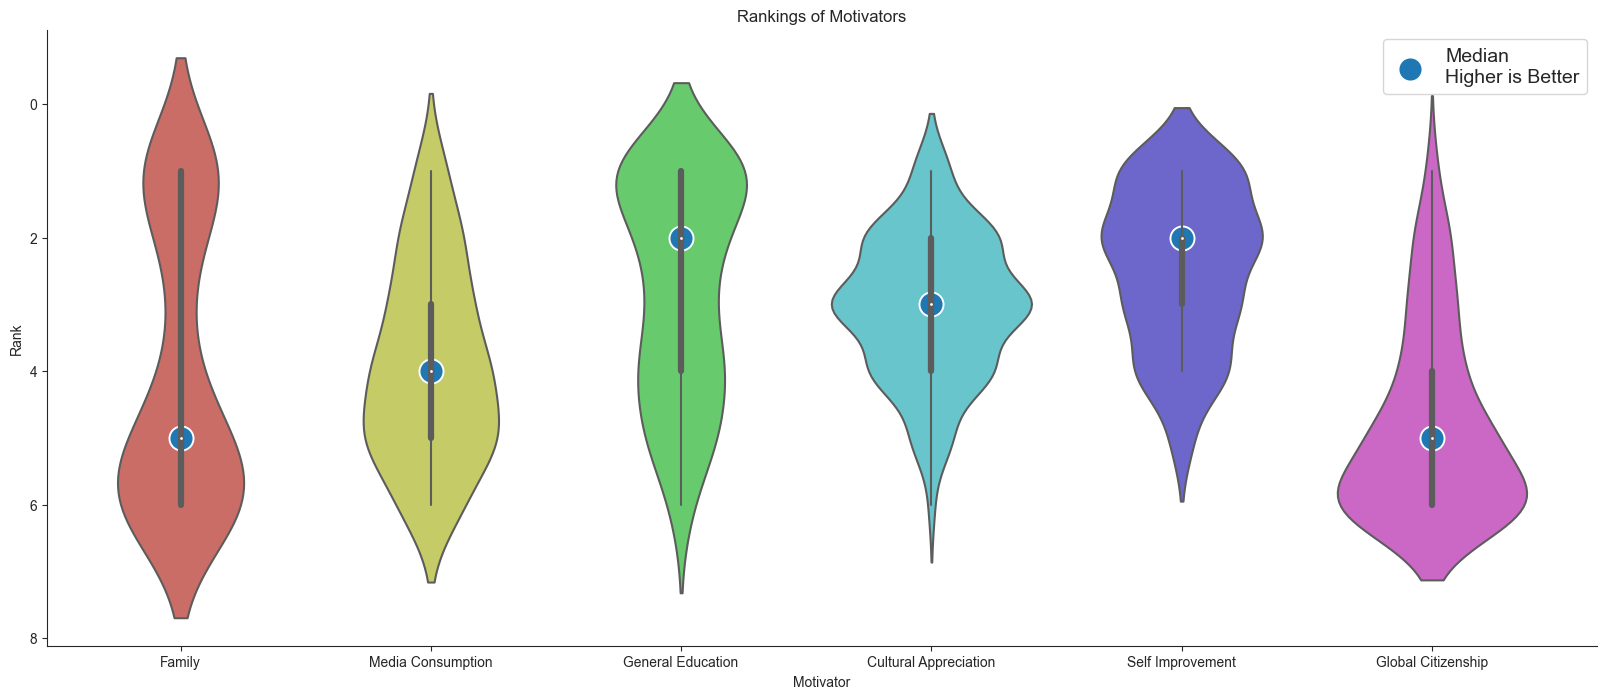

In [18]:
# Visualize the rankings
fig, ax = plt.subplots(figsize=(20, 8))
sns.violinplot(x="Motivator", y="Rank", data=rankings, palette='hls')

# Plot the median rank for each motivator
sns.scatterplot(data=summary_stats_df.T.reset_index()['Median'], s=300, 
                label='Median\nHigher is Better')
ax.legend(loc='upper right', fontsize=14)

# Flip the y axis
ax.invert_yaxis()
# Set the title
ax.set_title('Rankings of Motivators')
plt.show()

In [19]:
# Conduct a Friedman Test on the motivators within the dataframe
# Subjects are each row of the dataframe
friedman_results = pg.friedman(data=rankings, dv='Rank', within='Motivator', subject='index')

# Rename the columns
friedman_results = friedman_results.rename(columns={
    'p-unc': 'p_value', 
    'W': 'Kendall\'s W',
    'ddof1': 'Degrees of Freedom',
    'Q': 'Chi-Squared Score',}
)

# Print out the results
friedman_results

,Source,Kendall's W,Degrees of Freedom,Chi-Squared Score,p_value
Friedman,Motivator,0.228766,5,106.376344,2.387515e-21


This is actually quite interesting results due to the low Kendall's $W$ and super small $p$-value. 

With the low Kendall's $W$ of 0.2288, this essentially states that rankings across individuals flucates and don't maintain a consistent pattern. 

With the super low $p$ value, this tells us that our results are not due to random chance.

Together this actually tells us that the motivators are sporadic and that students taking language classes don't necessarily converge towards a common motivator for why they take these classes.

# Principal Component Analysis
---
To get a better grasp of the motivators, let's conduct a PCA to determine the groupings of our data

In [136]:
# Get a dataframe of just the questions of motivators
motivators_cols = df.columns[df.columns.str.contains('motivator')].tolist()

# Get the dataframe of just motivators
motivators = df[motivators_cols]

# Scale the data
motivators_scaled = preprocessing.scale(motivators.T)

In [137]:
pca = PCA()

# Fit the PCA
motivators_pca = pca.fit(motivators_scaled)
pca_data = pca.transform(motivators_scaled)

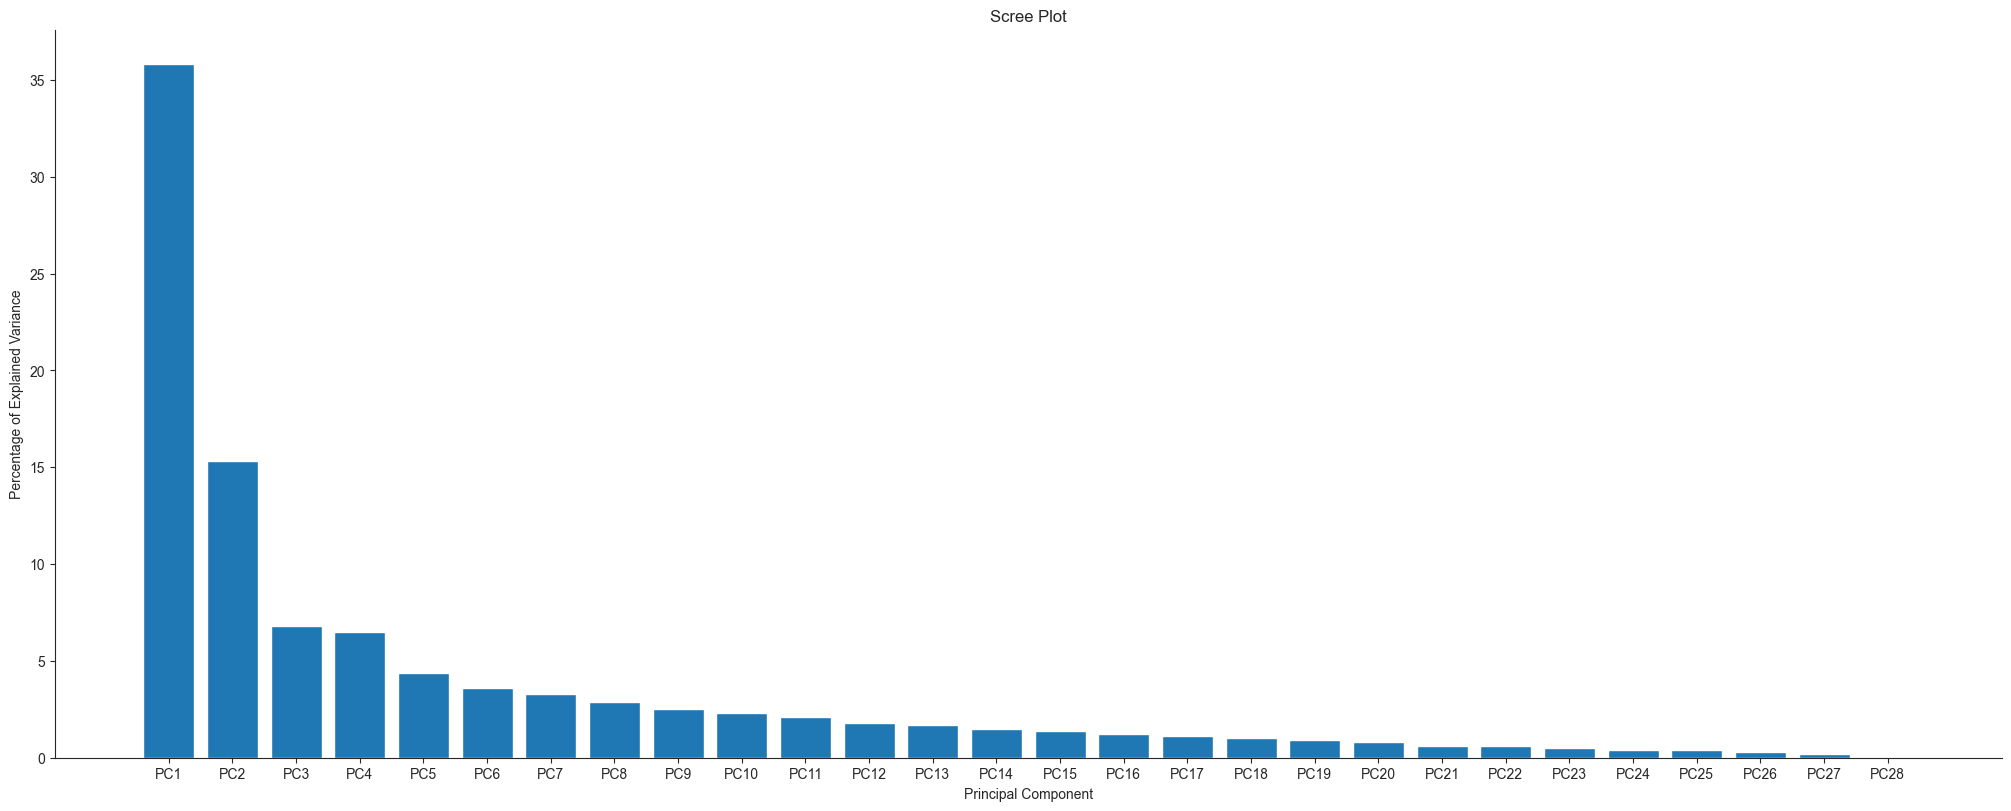

In [138]:
# Plot the scree plot

# Calculate the percentage of variance explained by each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var) + 1)]

fig, ax = plt.subplots(figsize=(20, 8), constrained_layout=True)
plt.bar(x=range(1, len(per_var) + 1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

In [139]:
# Remove the 'motivator_' from the list of motivator_cols
motivators_cols = [col.replace('motivator_', '') for col in motivators_cols]

In [140]:
pca_data.shape

(28, 28)

In [141]:
#pca_df = pd.DataFrame(pca_data, columns=motivators_cols)
pca_df = pd.DataFrame(pca_data, index=motivators_cols, columns=labels)

In [142]:
pca_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28
speak,-5.291365,-3.814708,3.679939,-2.195638,-2.257122,-0.043192,0.118336,-0.597298,-1.486485,-2.755364,...,0.902030,-1.569049,0.224273,-0.631654,-1.467534,0.047324,-0.585886,0.020891,-0.117279,6.409797e-16
great,-5.230548,0.531307,-1.652449,0.138267,-0.722496,1.137424,-0.651926,0.162290,0.732903,-1.594389,...,0.673998,-1.877333,-0.193963,-1.057494,1.142850,-0.941957,1.022199,-0.118079,0.087007,4.189351e-16
nervous,1.273980,-6.195233,4.380352,0.523132,3.934909,-1.804626,3.269538,2.505114,1.866059,-0.251239,...,-1.544857,0.223018,-0.409952,-0.462628,-0.101932,-0.423646,-0.198620,-0.041889,-0.044351,3.656814e-17
understand,-0.410234,-1.383432,-1.521292,-2.405455,-1.637237,2.810133,0.418918,-0.143712,4.029143,-1.712807,...,1.234229,0.709927,-0.356867,-0.375376,-0.119363,0.334299,0.139212,0.029098,0.209765,6.271019e-16
career,3.790323,2.808466,-2.223071,6.357652,-2.045427,2.112335,5.070914,0.570216,0.500642,-0.364304,...,-0.112441,-0.523676,0.155606,0.310443,-0.536978,-0.200798,-0.410039,0.018887,-0.013951,7.036159e-16
newspapers,-0.368175,-1.059277,1.293294,-3.982752,-2.272639,1.485592,1.953596,-4.272590,-0.087715,1.354942,...,-0.915003,-0.004474,0.561282,0.549623,0.747069,-0.388726,0.052562,-0.309792,0.077301,3.807367e-16
converse,-5.468781,-0.873038,0.026263,1.726847,-0.250077,-1.893215,-0.861490,0.322492,1.178525,1.001185,...,1.067919,0.042875,0.684248,0.290305,0.035214,-0.101412,-0.506363,1.921431,0.418224,1.234733e-16
aspects,-3.302170,0.960244,-1.183345,-0.367640,0.392230,-0.648487,-1.256665,0.364199,0.869215,-0.106643,...,-1.266080,-0.773316,2.086157,0.850987,0.084085,-0.247586,-0.612674,-0.021641,-0.844765,5.022018e-16
educated,-4.578090,-0.598251,0.776307,2.198189,-0.066457,-1.299080,-0.942102,0.214243,1.321558,0.632507,...,-1.259912,-1.429471,0.415140,0.203875,0.207683,2.000306,0.422245,-0.674260,0.967926,9.185354e-16
friends,-1.783964,-0.691301,-1.956100,-0.826371,1.018649,-1.336262,0.584853,-1.800964,0.977490,3.162886,...,-0.445147,-0.611964,-0.282092,-1.064309,-1.055379,-0.743172,0.430527,0.435389,-0.134066,3.512979e-17


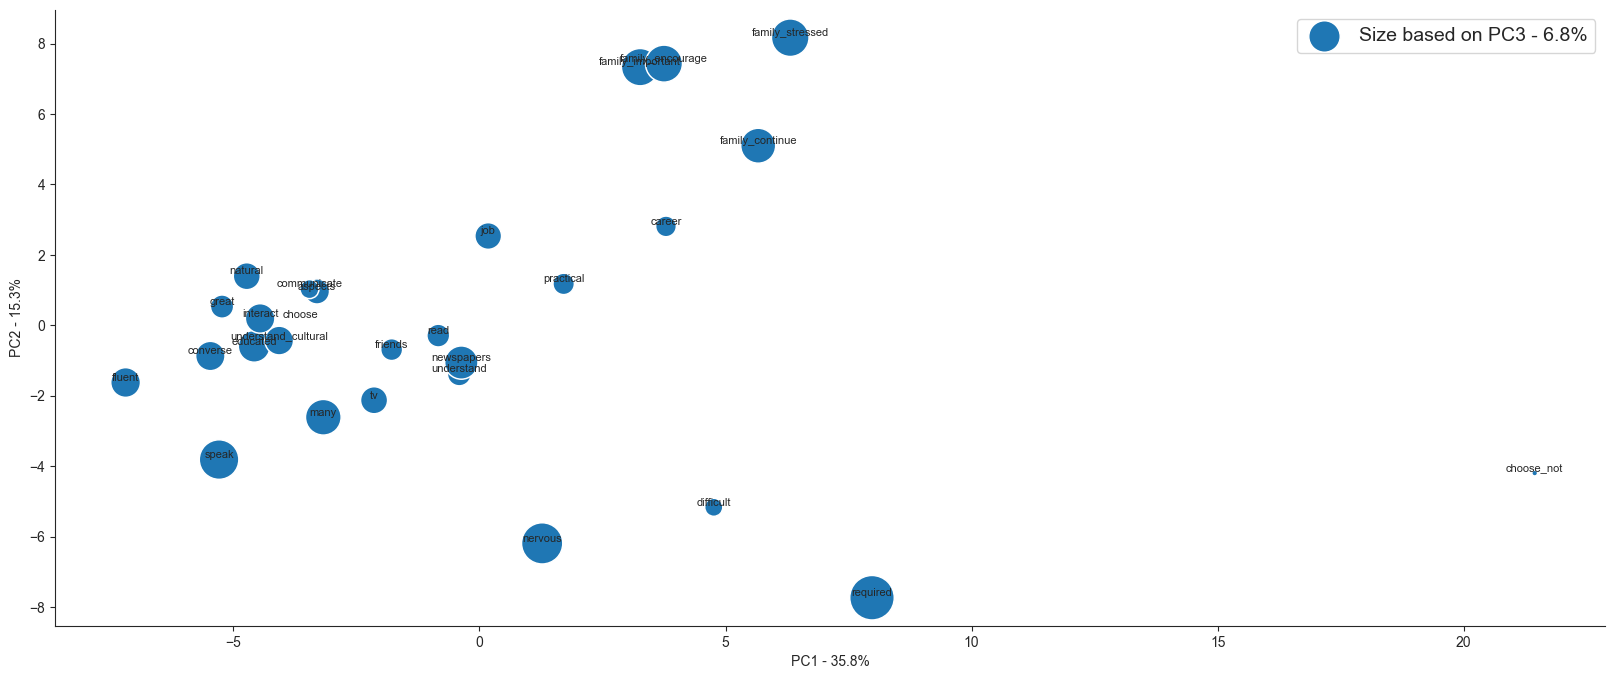

In [143]:
# Plot a 2d scatter plot of the first two principal components
# Scale the size the point based on the distance from the minimum value of the third principal component

# Get the minimum value of the third principal component
min_val = pca_df['PC3'].min()
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, ax=ax, s=100*(pca_df['PC3'] - min_val))
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))

# Add a legend saying size is based on the third principal component
ax.legend(['Size based on PC3 - {0}%'.format(per_var[2])], loc='upper right', fontsize=14)

# Add the labels to the points
for i, txt in enumerate(pca_df.index):
    ax.annotate(txt, (pca_df['PC1'][i], pca_df['PC2'][i]), fontsize=8, ha='center', va='bottom')

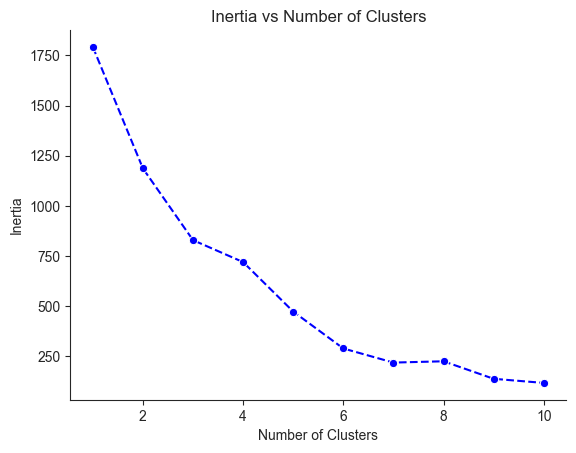

In [145]:
# Conduct a KNN analysis to see if the data can be classified into the different motivators based on the PCA

inertia = []
kmeans_clusters = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(pca_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])
    kmeans_clusters.append(kmeans)
    inertia.append(kmeans.inertia_)

# Plot the inertia
sns.lineplot(x=range(1, 11), y=inertia, marker='o', linestyle='--', color='b')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Inertia vs Number of Clusters')
plt.show()


In [152]:
# Create a dataframe which contains only 7 clusters
cluster_7_df = pca_df.copy()

# Select 6 clusters based on the elbow method
kmeans = KMeans(n_clusters=7, random_state=42, n_init='auto')
kmeans.fit(cluster_7_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])

# Get the cluster labels
cluster_labels = kmeans.labels_

# Add the cluster labels to the dataframe
cluster_7_df['Cluster'] = cluster_labels

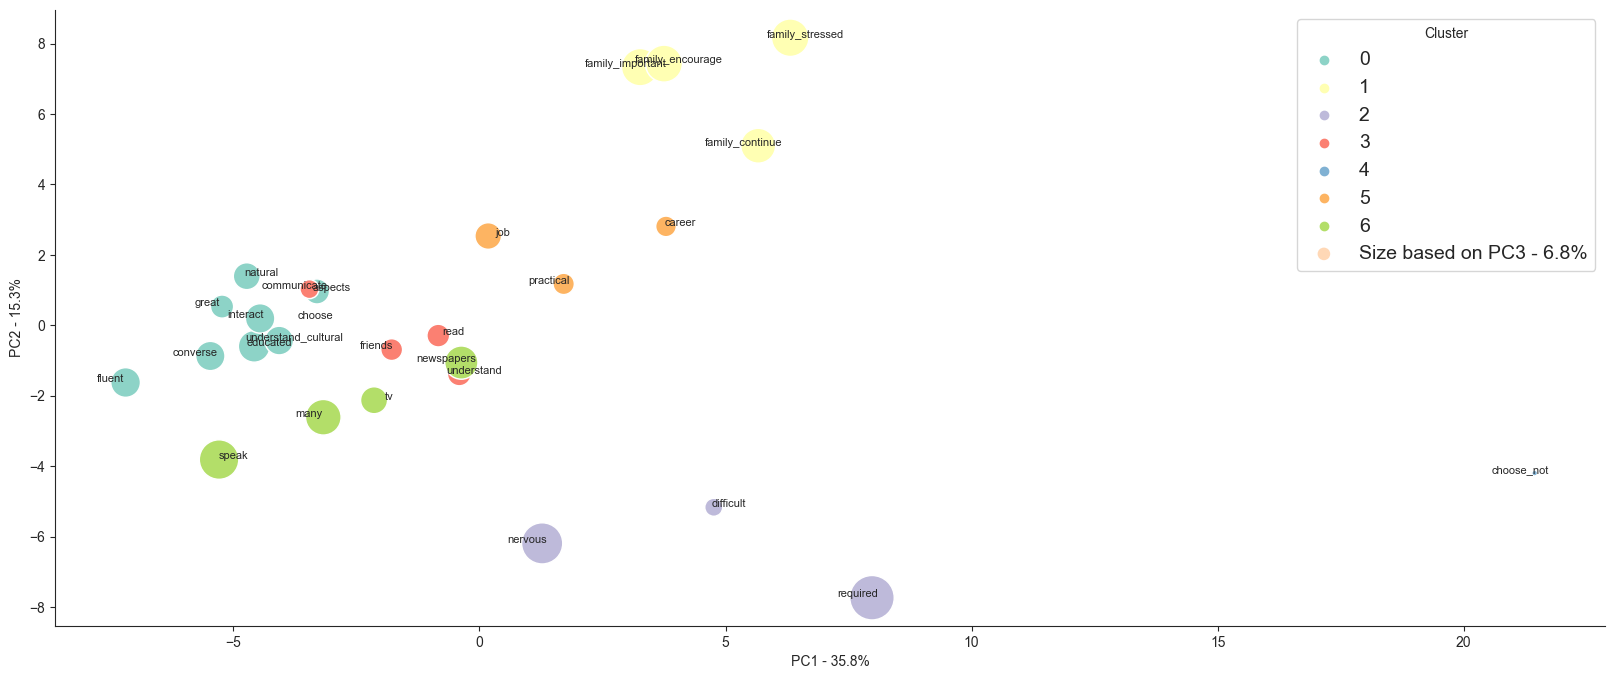

In [153]:
# Plot a 2d scatter plot of the first two principal components
# Scale the size the point based on the distance from the minimum value of the third principal component

# Get the minimum value of the third principal component
min_val = cluster_7_df['PC3'].min()
fig, ax = plt.subplots(figsize=(20, 8))
sns.scatterplot(x='PC1', y='PC2', 
                data=cluster_7_df, ax=ax, 
                s=100*(cluster_7_df['PC3'] - min_val), hue='Cluster',
                palette='Set3')
ax.set_xlabel('PC1 - {0}%'.format(per_var[0]))
ax.set_ylabel('PC2 - {0}%'.format(per_var[1]))

# Add an item to the legend for the size
handles, labels = ax.get_legend_handles_labels()
handles.append(plt.scatter([],[], s=8*(cluster_7_df['PC3'] - min_val).max(), 
                           alpha=0.3, edgecolors='none'))
labels.append('Size based on PC3 - {0}%'.format(per_var[2]))

ax.legend(handles, labels, loc='upper right', title='Cluster', fontsize=14)

# Add the labels to the points
x_offset = 0.3
y_offset = 0.1
for i, txt in enumerate(cluster_7_df.index):
    ax.annotate(txt, (cluster_7_df['PC1'][i]+x_offset, cluster_7_df['PC2'][i]+y_offset), fontsize=8, ha='center', va='center')
    # Change the offset for the next point
    if i % 2 == 0:
        x_offset *= -1

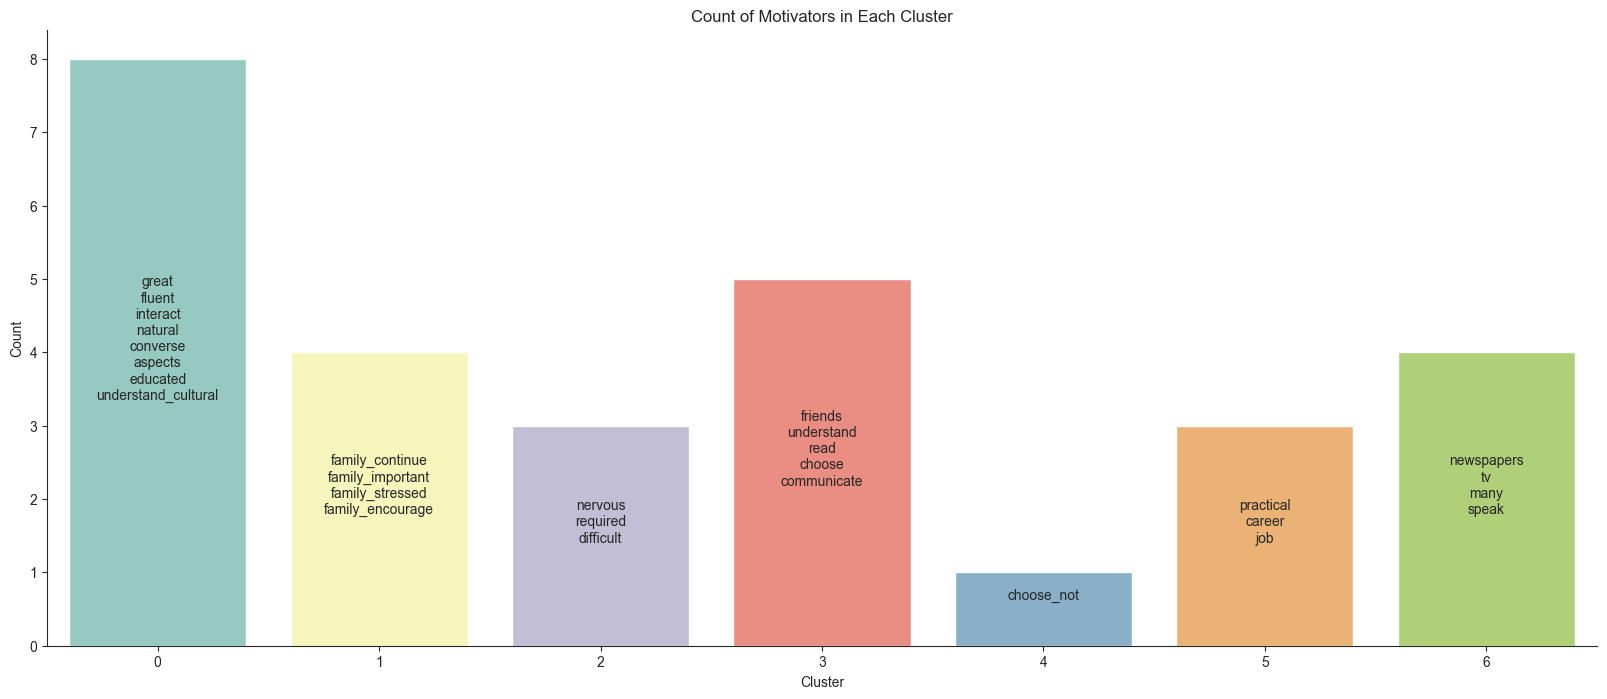

In [157]:
# Create a table which sorts the motivators by the cluster they are in
cluster_table = cluster_7_df.sort_values(by='Cluster', ascending=True)
cluster_table.drop(cluster_table.columns[cluster_table.columns.str.contains('PC')].tolist(),
                    axis=1, 
                    inplace=True)

# Graph the clusters
fig, ax = plt.subplots(figsize=(20, 8))
cluster_plt = sns.countplot(x='Cluster', data=cluster_7_df, ax=ax, palette='Set3')

# Add 'motivators_' to the labels
#motivator_short_labels = ['motivator_' + str(x) for x in cluster_table.index]

# Remap the labels to the extended version using the decode dictionary defined earlier
#motivator_remapping = [decode_dict[x] for x in motivator_short_labels]
#cluster_table.index = motivator_remapping

# Truncate the labels to 20 characters
#cluster_table.index = [x[:20] + '...' for x in cluster_table.index]

# Add the labels to the bars
for cluster, p in enumerate(cluster_plt.patches, start=0):
    cluster_list = cluster_table[cluster_table['Cluster'] == cluster].index.tolist()
    cluster_plt.annotate('\n'.join(cluster_list),
                            (p.get_x() + p.get_width() / 2., p.get_height()/2),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')

ax.set_xlabel('Cluster')
ax.set_ylabel('Count')
ax.set_title('Count of Motivators in Each Cluster')
plt.show()


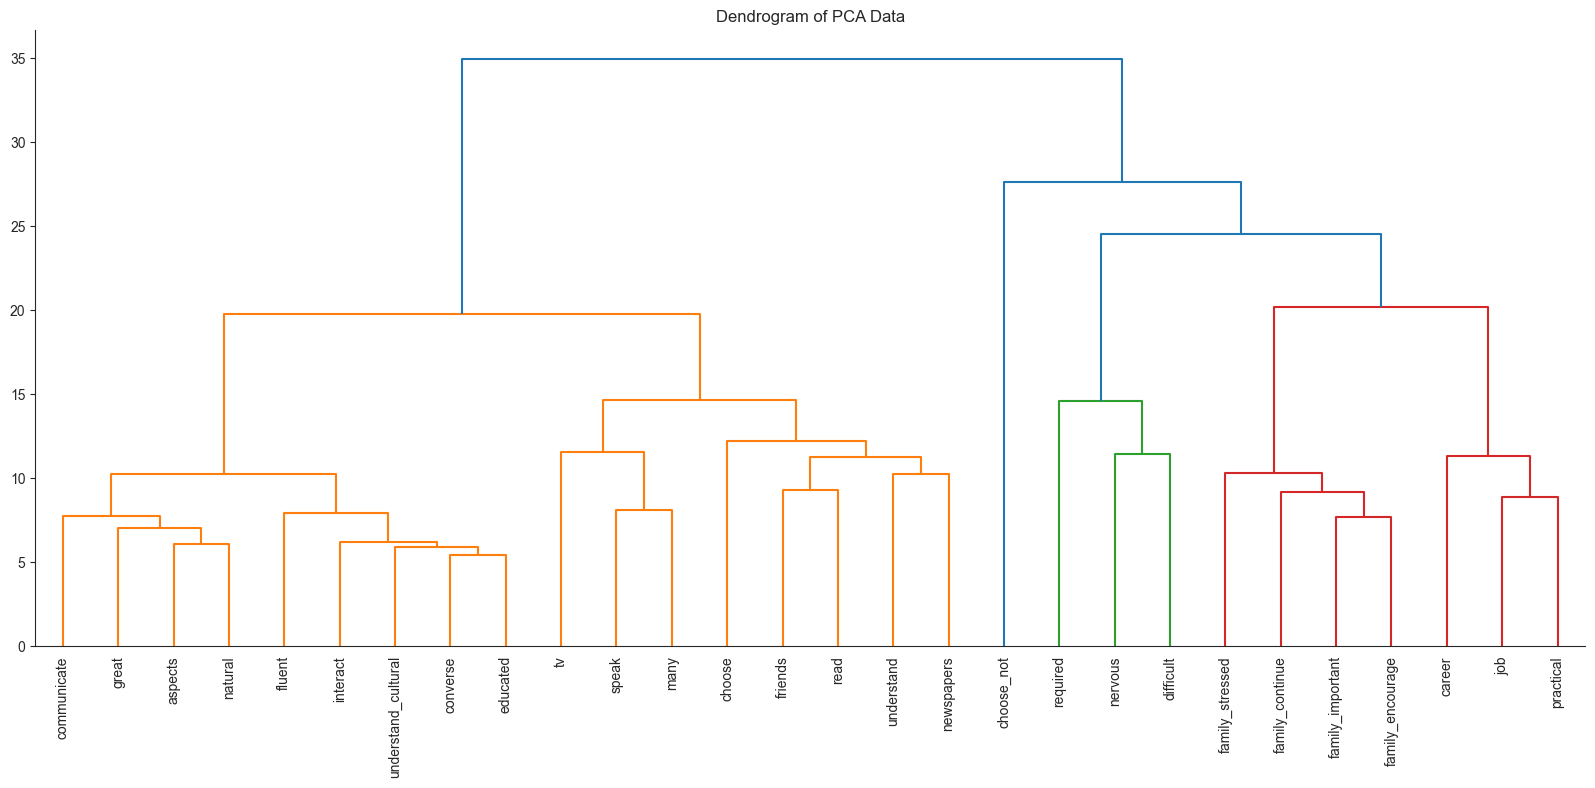

In [155]:
# Create a dendrogram of the PCA dataframe
# Calculate the linkage
linkage = hierarchy.linkage(cluster_7_df, method='ward')

# Plot the dendrogram
fig, ax = plt.subplots(figsize=(20, 8))
hierarchy.dendrogram(linkage, labels=cluster_7_df.index, ax=ax, leaf_rotation=90)
plt.title('Dendrogram of PCA Data')
plt.show()

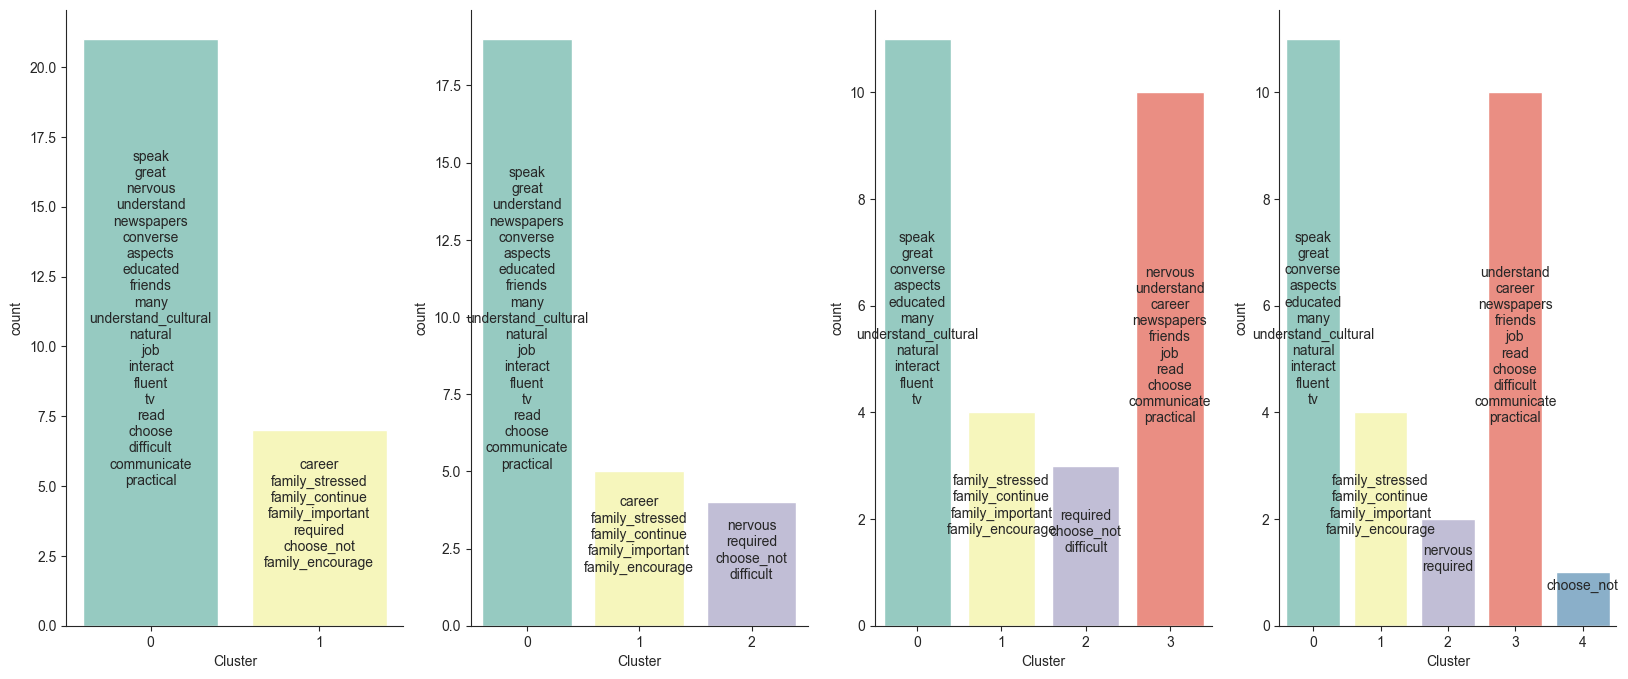

In [180]:
# Create a count plot of clusters for 3, 4, and 5 clusters
fig, ax = plt.subplots(1, 4, figsize=(20, 8))

# Compute the cluster for 2
cluster_2_df = pca_df.copy()
kmeans = KMeans(n_clusters=2, random_state=42, n_init='auto')
kmeans.fit(cluster_2_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])
cluster_2_df['Cluster'] = kmeans.labels_
cluster_2_plt = sns.countplot(x='Cluster', data=cluster_2_df, ax=ax[0], palette='Set3')

# Add the labels to the bars
for cluster, p in enumerate(cluster_2_plt.patches, start=0):
    cluster_list = cluster_2_df[cluster_2_df['Cluster'] == cluster].index.tolist()
    cluster_2_plt.annotate('\n'.join(cluster_list),
                            (p.get_x() + p.get_width() / 2., p.get_height()/2),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')

# Compute the cluster for 3
cluster_3_df = pca_df.copy()
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(cluster_3_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])
cluster_3_df['Cluster'] = kmeans.labels_
cluster_3_plt = sns.countplot(x='Cluster', data=cluster_3_df, ax=ax[1], palette='Set3')

# Add the labels to the bars
for cluster, p in enumerate(cluster_3_plt.patches, start=0):
    cluster_list = cluster_3_df[cluster_3_df['Cluster'] == cluster].index.tolist()
    cluster_3_plt.annotate('\n'.join(cluster_list),
                            (p.get_x() + p.get_width() / 2., p.get_height()/2),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')

# Compute the cluster for 4
cluster_4_df = pca_df.copy()
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
kmeans.fit(cluster_4_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])
cluster_4_df['Cluster'] = kmeans.labels_
cluster_4_plt = sns.countplot(x='Cluster', data=cluster_4_df, ax=ax[2], palette='Set3')

# Add the labels to the bars
for cluster, p in enumerate(cluster_4_plt.patches, start=0):
    cluster_list = cluster_4_df[cluster_4_df['Cluster'] == cluster].index.tolist()
    cluster_4_plt.annotate('\n'.join(cluster_list),
                            (p.get_x() + p.get_width() / 2., p.get_height()/2),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')

# Compute the cluster for 5
cluster_5_df = pca_df.copy()
kmeans = KMeans(n_clusters=5, random_state=42, n_init='auto')
kmeans.fit(cluster_5_df[['PC1', 'PC2', 'PC3', 'PC4', 'PC5']])
cluster_5_df['Cluster'] = kmeans.labels_
cluster_5_plt = sns.countplot(x='Cluster', data=cluster_5_df, ax=ax[3], palette='Set3')

# Add the labels to the bars
for cluster, p in enumerate(cluster_5_plt.patches, start=0):
    cluster_list = cluster_5_df[cluster_5_df['Cluster'] == cluster].index.tolist()
    cluster_5_plt.annotate('\n'.join(cluster_list),
                            (p.get_x() + p.get_width() / 2., p.get_height()/2),
                            ha = 'center', va = 'center',
                            xytext = (0, 10),
                            textcoords = 'offset points')